In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data and convert to a dataframe
data_analysis_to_load = "college_and_crime_cleaned_data.csv"

data_analysis = pd.read_csv(data_analysis_to_load)
data_analysis.head(12)

,Race/ethnicity,Sex,Year,per_college_enroll,SE_college_enroll,SE_per_youth_crime_exposure,per_youth_crime_exposure,Type of violent crime
0,"White, non-Hispanic",Male,2000,36.2,0.79,0.6,6.7,Violent crime
1,"White, non-Hispanic",Male,2000,36.2,0.79,0.3,2.0,Serious violent crime
2,"White, non-Hispanic",Male,2000,36.2,0.79,0.5,5.0,Simple assault
3,"White, non-Hispanic",Male,2001,37.2,0.79,0.5,5.2,Violent crime
4,"White, non-Hispanic",Male,2001,37.2,0.79,0.2,1.6,Serious violent crime
5,"White, non-Hispanic",Male,2001,37.2,0.79,0.4,3.8,Simple assault
6,"White, non-Hispanic",Male,2002,38.9,0.77,0.5,4.3,Violent crime
7,"White, non-Hispanic",Male,2002,38.9,0.77,0.2,1.2,Serious violent crime
8,"White, non-Hispanic",Male,2002,38.9,0.77,0.4,3.5,Simple assault
9,"White, non-Hispanic",Male,2003,38.5,0.77,0.5,4.6,Violent crime


## Enrolled in College by Race

In [3]:
# College enrollment is repeated because of three types of crime
# Retained one for this analysis
remove_triples = data_analysis.loc[data_analysis["Type of violent crime"] == "Violent crime"]

In [4]:
# Group by race and by year
# Calculate the means based on race and year
by_race = remove_triples.groupby(["Race/ethnicity", "Year"]).mean()

In [5]:
# Transpose the table so that each race is a column
by_year_by_race = pd.pivot_table(by_race, index=['Year'], columns = "Race/ethnicity")

# Create a dataframe with only the mean percent college enrollment
rate_by_year_by_race = by_year_by_race["per_college_enroll"]

# Reset the index
rate_by_year_by_race = rate_by_year_by_race.reset_index()

# Print head (check data)
rate_by_year_by_race.head()

Race/ethnicity,Year,"Black, non-Hispanic",Hispanic,"Two or more races, non-Hispanic","White, non-Hispanic"
0,2000,30.15,21.95,NaN,38.75
1,2001,31.10,21.75,NaN,39.55
2,2002,31.60,20.30,NaN,40.85
3,2003,32.10,23.85,41.50,41.50
4,2004,31.55,24.95,36.65,41.70


In [6]:
# Create a dataframe with only the mean standard errors of percent college enrollment
se_rate_by_year_by_race = by_year_by_race["SE_college_enroll"]

# Reset the index
se_rate_by_year_by_race = se_rate_by_year_by_race.reset_index()

# Print head (check data)
se_rate_by_year_by_race.head()

Race/ethnicity,Year,"Black, non-Hispanic",Hispanic,"Two or more races, non-Hispanic","White, non-Hispanic"
0,2000,1.695,1.585,NaN,0.800
1,2001,1.705,1.545,NaN,0.805
2,2002,1.655,1.340,NaN,0.775
3,2003,1.685,1.435,5.06,0.775
4,2004,1.650,1.445,4.86,0.770


In [7]:
# List of the years for the x-axis
x_axis_by_year = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

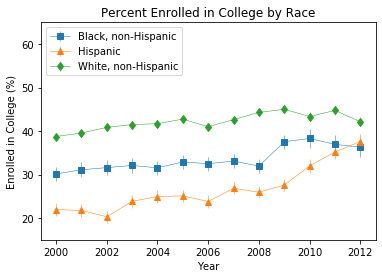

In [9]:
# Create the plot area
fig, ax = plt.subplots()

# Plot the mean and standard error for college enrollment based on race
ax.errorbar(x_axis_by_year, rate_by_year_by_race["Black, non-Hispanic"], 
            se_rate_by_year_by_race["Black, non-Hispanic"], linewidth = 0.5, marker = "s", 
            label = "Black, non-Hispanic")
ax.errorbar(x_axis_by_year, rate_by_year_by_race["Hispanic"], 
            se_rate_by_year_by_race["Hispanic"], linewidth = 0.5, marker = "^", 
            label = "Hispanic")
ax.errorbar(x_axis_by_year, rate_by_year_by_race["White, non-Hispanic"], 
            se_rate_by_year_by_race["White, non-Hispanic"], linewidth = 0.5, marker = "d", 
            label = "White, non-Hispanic")

# Set the x-axis range
ax.set_ylim(15, 65)

# Label the x- and y-axes
ax.set_xlabel("Year")
ax.set_ylabel("Enrolled in College (%)")

# Label the graph
ax.set_title("Percent Enrolled in College by Race")

# Place the legend in the best place on the plot and make the font readable
plt.legend(loc = "upper left", fontsize = "medium")

# Save the graph
plt.savefig("../college_enroll_by_race.png")

## Youth Exposure to Crime by Type

In [10]:
# Group by type of crime and by year
types_of_crime_year = data_analysis.groupby(["Type of violent crime", "Year"]).mean()

In [11]:
# Transpose the table so that each type of crime is a column
by_year_types = pd.pivot_table(types_of_crime_year, index=['Year'], 
                               columns = "Type of violent crime")

# Create a dataframe with only the mean percent of youth exposure
rate_by_year_types = by_year_types["per_youth_crime_exposure"]

# Reset the index
rate_by_year_types = rate_by_year_types.reset_index()

# Print head (check data)
rate_by_year_types.head()

Type of violent crime,Year,Serious violent crime,Simple assault,Violent crime
0,2000,2.633333,4.900000,7.066667
1,2001,2.500000,4.216667,6.383333
2,2002,2.066667,3.733333,5.516667
3,2003,5.612500,7.362500,11.062500
4,2004,1.657143,5.514286,6.062500


In [12]:
# Create a dataframe with only the standard error for percent youth exposure
se_rate_by_year_types = by_year_types["SE_per_youth_crime_exposure"]

# Reset the index
se_rate_by_year_types = se_rate_by_year_types.reset_index()

# Print head (check data)
se_rate_by_year_types.head()

Type of violent crime,Year,Serious violent crime,Simple assault,Violent crime
0,2000,0.466667,0.683333,0.900
1,2001,0.450000,0.600000,0.800
2,2002,0.416667,0.600000,0.800
3,2003,1.525000,1.712500,2.125
4,2004,0.485714,1.171429,1.275


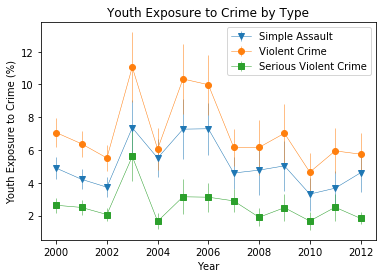

In [13]:
# Create the plot area
fig, ax = plt.subplots()

# Plot the mean and standard error for type of crime youth were exposed to based on year
ax.errorbar(x_axis_by_year, rate_by_year_types["Simple assault"], 
            se_rate_by_year_types["Simple assault"], linewidth = 0.5, marker = "v", 
            label = "Simple Assault")
ax.errorbar(x_axis_by_year, rate_by_year_types["Violent crime"], 
            se_rate_by_year_types["Violent crime"], linewidth = 0.5, marker = "o", 
            label = "Violent Crime")
ax.errorbar(x_axis_by_year, rate_by_year_types["Serious violent crime"], 
            se_rate_by_year_types["Serious violent crime"], linewidth = 0.5, marker = "s", 
            label = "Serious Violent Crime")

# Set the x-axis range
#ax.set_ylim(15, 65)

# Label the x- and y-axes
ax.set_xlabel("Year")
ax.set_ylabel("Youth Exposure to Crime (%)")

# Label the graph
ax.set_title("Youth Exposure to Crime by Type")

# Place the legend in the best place on the plot and make the font readable
plt.legend(loc = "upper right", fontsize = "medium")

# Save the graph
plt.savefig("../youth_exposure_by_crime_type.png")

## Youth Exposure to Crime by Sex

In [14]:
# Group by type of crime and by year
types_of_crime_sex = data_analysis.groupby(["Type of violent crime", "Sex"]).mean()

In [15]:
# Transpose the table so that each type of crime is a column
by_sex_types = pd.pivot_table(types_of_crime_sex, index=["Type of violent crime"], 
                               columns = "Sex")

# Create a dataframe with only the mean percent of youth exposure
rate_by_sex_types = by_sex_types["per_youth_crime_exposure"]

# Reset the index
rate_by_sex_types = rate_by_sex_types.reset_index()

# Print head (check data)
rate_by_sex_types.head()

Sex,Type of violent crime,Female,Male
0,Serious violent crime,3.254348,2.106522
1,Simple assault,5.704082,4.579167
2,Violent crime,8.379592,5.885714


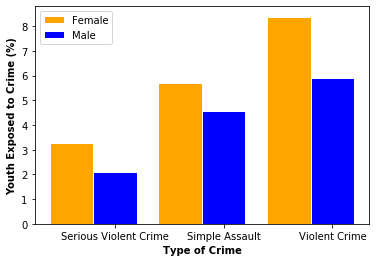

In [16]:
barWidth = 0.4

# set height of bar
bars1 = rate_by_sex_types["Female"]
bars2 = rate_by_sex_types["Male"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color = "orange", width = barWidth, edgecolor = "white", 
        label = "Female")
plt.bar(r2, bars2, color = "blue", width = barWidth, edgecolor = "white", 
        label = "Male")

# Add xticks on the middle of the group bars
plt.ylabel("Youth Exposed to Crime (%)", fontweight = "bold")
plt.xlabel("Type of Crime", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ["Serious Violent Crime", 
                                                       "Simple Assault", "Violent Crime"])
 
# Create legend & Show graphic
plt.legend()

# Save the graph
plt.savefig("../youth_exposed_by_sex.png")

In [17]:
# Group by type of crime and by year
types_of_crime_race = data_analysis.groupby(["Type of violent crime", "Race/ethnicity"]).mean()

In [18]:
# Transpose the table so that each type of crime is a column
by_race_types = pd.pivot_table(types_of_crime_race, index=["Type of violent crime"], 
                               columns = "Race/ethnicity")

# Create a dataframe with only the mean percent of youth exposure
rate_by_race_types = by_race_types["per_youth_crime_exposure"]

# Reset the index
rate_by_race_types = rate_by_race_types.reset_index()

# Print head (check data)
rate_by_race_types.head()

Race/ethnicity,Type of violent crime,"Black, non-Hispanic",Hispanic,"Two or more races, non-Hispanic","White, non-Hispanic"
0,Serious violent crime,2.484615,2.092308,6.100000,1.623077
1,Simple assault,3.730769,3.207692,11.568421,3.811538
2,Violent crime,5.869231,5.103846,13.970000,5.165385


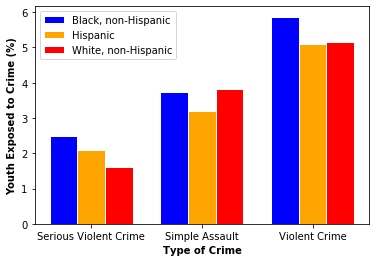

In [19]:
barWidth = 0.25

# set height of bar
bars1 = rate_by_race_types["Black, non-Hispanic"]
bars2 = rate_by_race_types["Hispanic"]
bars3 = rate_by_race_types["White, non-Hispanic"]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color = "blue", width = barWidth, edgecolor = "white", 
        label = "Black, non-Hispanic")
plt.bar(r2, bars2, color = "orange", width = barWidth, edgecolor = "white", 
        label = "Hispanic")
plt.bar(r3, bars3, color = "red", width = barWidth, edgecolor = "white", 
        label = "White, non-Hispanic")

# Add xticks on the middle of the group bars
plt.ylabel("Youth Exposed to Crime (%)", fontweight = "bold")
plt.xlabel("Type of Crime", fontweight = "bold")
plt.xticks([r + barWidth for r in range(len(bars1))], ["Serious Violent Crime", 
                                                       "Simple Assault", "Violent Crime"])
 
# Create legend & Show graphic
plt.legend()

# Save the graph
plt.savefig("../youth_exposed_by_race.png")